<a href="https://colab.research.google.com/github/Shashwat-spyder/NYC-Taxi-Trip-Time/blob/main/New_York_Taxi_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [242]:
#Mounting gdrive
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [243]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [244]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#importing haversine fuction 
from haversine import haversine

Haversine function takes latitude and longitude of any two points on a spherical plane and returns the distance between them.

In [245]:
#Reads the input dataset as pandas dataframe
nyc_df=pd.read_csv('/content/Drive/My Drive/NYC Taxi Data (1).csv')

In [246]:
#First 5 observations
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [247]:
#Dimension of dataframe
nyc_df.shape

(1458644, 11)

Dataset consists of 14,58,644 rows and 11 columns.

In [248]:
#Information on datatypes and non null value counts from columns
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [249]:
#Description of data rounded upto two decimal places
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


The passenger count has values 0 and trip duration has a value of 1 seconds which can be erroneous.

## **Data Preprocessing**

Finding and solving outliers using appropriate techniques.

We can see from above that no null values are present in the dataset. So an outlier detection is enough for preprocessing.

Target Variable

In [250]:
#Distribution plot of trip_duration
# sns.distplot(nyc_df['trip_duration'],bins=5)

trip_duration is highly positively skewed. Some values in the dataset vary largely w.r.t rest. 

In [251]:
#Sorting trip_duration values in descending order
nyc_df['trip_duration'].sort_values(ascending=False).head(10)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64

There are unusual observations present in our target variable(trip_duraion).Lets remove trip_duration observations that are more than two standard deviations away from the mean duration time

In [252]:
#Removing outliers from target variable
trip_duration_mean = np.mean(nyc_df['trip_duration'])
trip_duration_std = np.std(nyc_df['trip_duration'])
nyc_df = nyc_df[nyc_df['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
nyc_df = nyc_df[nyc_df['trip_duration']>= trip_duration_mean - 2*trip_duration_std]

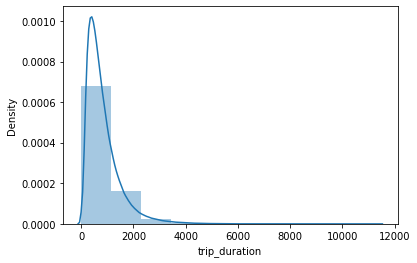

In [253]:
#Distribution plot of target variable
sns.distplot(nyc_df['trip_duration'],bins=10)

Lets perform a log transformation on target varibale to make it symmetrical and reduce the positive skewness.

In [254]:
#prints skewness
print(nyc_df['trip_duration'].skew())
# print(np.log10(nyc_df['trip_duration'].skew()))

2.3189586838382477


The log transformed value has better symmetry as compared to the previous value of trip duration. 

In [255]:
#log transformed target variable
nyc_df['trip_duration']=np.log10(nyc_df['trip_duration'])

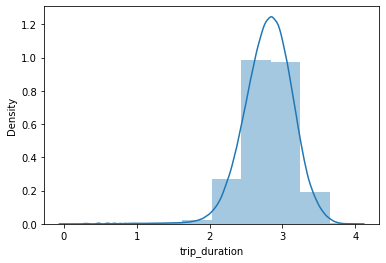

In [256]:
#Distribution plot of target variable
sns.distplot(nyc_df['trip_duration'],bins=10)

In [257]:
#Skewness value after log transformation
nyc_df['trip_duration'].skew()

-0.6890991464496602

The target varibale is slightly left skewed after the log tranformation but it gives a better value. Lets go with it.


passenger_count

In [258]:
#Count the number of unique values
nyc_df['passenger_count'].value_counts()

1    1032274
2     210008
5      77869
3      59777
6      48200
4      28348
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

The counts where number of passengers are 7,9 and 8 are less w.r.t the other values. Also there are 59 observations where passenger count is 0.

In [259]:
#Drop observations where the passenger count is 0 and greater than 6
nyc_df.drop(nyc_df[nyc_df['passenger_count'] >=7].index, inplace = True)
nyc_df.drop(nyc_df[nyc_df['passenger_count'] ==0].index, inplace = True)

In [260]:
#Count the number of unique values
nyc_df['passenger_count'].value_counts()

1    1032274
2     210008
5      77869
3      59777
6      48200
4      28348
Name: passenger_count, dtype: int64

We have geometrical points in terms of longitude and latitude of pickup and dropoff locations. 

Also the coordinates of New York city is as follow:

Latitude is between 40.7128 and 40.748817 

Longitude is between - 74.0059 and - 73.968285

In [261]:
#Minimum and miximum values of latitude and longitude
print('Latitide of pickup location lies between {0} and {1}'.format(nyc_df['pickup_latitude'].min(),nyc_df['pickup_latitude'].max()))
print('Longitude of pickup location lies between {0} and {1}'.format(nyc_df['pickup_longitude'].min(),nyc_df['pickup_longitude'].max()))
print('Latitide of dropoff location lies between {0} and {1}'.format(nyc_df['dropoff_latitude'].min(),nyc_df['dropoff_latitude'].max()))
print('Longitude of pickup location lies between {0} and {1}'.format(nyc_df['dropoff_longitude'].min(),nyc_df['dropoff_longitude'].max()))

Latitide of pickup location lies between 34.35969543457031 and 51.88108444213867
Longitude of pickup location lies between -121.93334197998048 and -61.33552932739258
Latitide of dropoff location lies between 32.1811408996582 and 43.92102813720703
Longitude of pickup location lies between -121.9333038330078 and -61.33552932739258


The pickup and dropoff longitudes and latitudes clearly do not lie in the New York region.

In [262]:
#Removing the ouliers among coordinates
nyc_df=nyc_df[nyc_df['pickup_latitude']>=40.7128]
nyc_df=nyc_df[nyc_df['pickup_latitude']<=40.748817]
nyc_df=nyc_df[nyc_df['dropoff_latitude']>=40.7128]
nyc_df=nyc_df[nyc_df['dropoff_latitude']<=40.748817]
nyc_df=nyc_df[nyc_df['pickup_longitude']>=-74.0059]
nyc_df=nyc_df[nyc_df['pickup_longitude']<=-73.968285]
nyc_df=nyc_df[nyc_df['dropoff_longitude']<=-73.968285]
nyc_df=nyc_df[nyc_df['dropoff_longitude']>=-74.0059]
nyc_df.shape

(189681, 11)

Further, we can create features like speed and distance from the latitude and longitude values of pickup and drop location.

In [263]:
#Function to return haversine ditance
def distance(lat1,long1,lat2,long2):
  '''Function to find sperical distance from one point to another
  lat- longitude
  long-longitude
  1-pickup location
  2-dropoff location
  '''
  distance = haversine((lat1,long1),(lat2,long1))+haversine((lat1,long1),(lat1,long2))
  return distance

In [264]:
#distance column stores the values of distance function
nyc_df["distance"] = (nyc_df.apply(lambda row: distance(row.pickup_latitude, row.pickup_longitude,row.dropoff_latitude,row.dropoff_longitude), axis=1))

In [265]:
nyc_df["speed"] = (nyc_df["distance"]) / ((10**nyc_df["trip_duration"])/3600)

In [266]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,2.821514,2.430509,13.197336
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,2.406540,1.774807,25.056097
17,id1154431,1,2016-04-14 08:48:26,2016-04-14 09:00:37,1,-73.994255,40.745804,-73.999657,40.723343,N,2.863917,2.952593,14.540812
19,id3390316,2,2016-06-05 13:47:23,2016-06-05 13:51:34,1,-73.983887,40.738197,-73.991203,40.727871,N,2.399674,1.764684,25.310206
37,id2403238,1,2016-06-23 23:00:09,2016-06-23 23:04:46,1,-73.988068,40.728081,-73.980751,40.721470,N,2.442480,1.351631,17.566318


In [267]:
# Delimit pickup_datetime variable 
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

nyc_df['pickup_date'] = nyc_df['pickup_datetime'].dt.date # Extract date
nyc_df['pickup_time'] = nyc_df['pickup_datetime'].dt.time # Extract time

# Delimit dropoff_datetime variables
nyc_df['dropoff_date'] = nyc_df['dropoff_datetime'].dt.date # Extract date
nyc_df['dropoff_time'] = nyc_df['dropoff_datetime'].dt.time # Extract time

# Additional pickup features
nyc_df['pickup_month'] = nyc_df['pickup_datetime'].dt.month # Extract month
nyc_df['pickup_hour'] = nyc_df['pickup_datetime'].dt.hour # Extract hour
nyc_df['pickup_weekday'] = nyc_df['pickup_datetime'].dt.dayofweek # Extract day name

# Drop concatentated timestamp columns
nyc_df.drop(['pickup_datetime'], axis = 1, inplace = True)
nyc_df.drop(['dropoff_datetime'], axis = 1, inplace = True)

# Confirm changes
nyc_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'distance', 'speed',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'pickup_month', 'pickup_hour', 'pickup_weekday'],
      dtype='object')

In [268]:
#printing columns alongside data type
for row in nyc_df.columns:
  print(row, type(nyc_df.iloc[0][row]))

id <class 'str'>
vendor_id <class 'numpy.int64'>
passenger_count <class 'numpy.int64'>
pickup_longitude <class 'numpy.float64'>
pickup_latitude <class 'numpy.float64'>
dropoff_longitude <class 'numpy.float64'>
dropoff_latitude <class 'numpy.float64'>
store_and_fwd_flag <class 'str'>
trip_duration <class 'numpy.float64'>
distance <class 'numpy.float64'>
speed <class 'numpy.float64'>
pickup_date <class 'datetime.date'>
pickup_time <class 'datetime.time'>
dropoff_date <class 'datetime.date'>
dropoff_time <class 'datetime.time'>
pickup_month <class 'numpy.int64'>
pickup_hour <class 'numpy.int64'>
pickup_weekday <class 'numpy.int64'>


## **Exploratory Data Analysis**

**Target Variable** : trip_duration

Text(0, 0.5, 'Probability density')

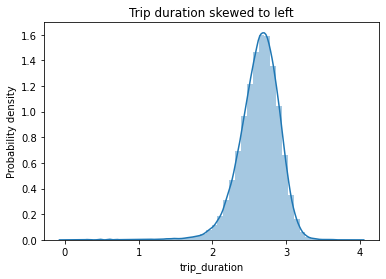

In [269]:
# skewness=nyc_df['trip_duration'].skew()
sns.distplot(nyc_df['trip_duration'])
# plt.title(r'$\mathrm{Trip\ duration\ skewed \ to \ the \ right:}\ \skewness=%.3f$'%(skewness))
plt.title('Trip duration skewed to left')
plt.xlabel('trip_duration')
plt.ylabel('Probability density')

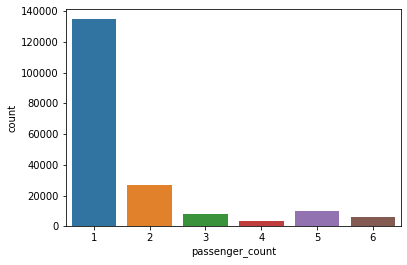

In [270]:
sns.countplot(x='passenger_count', data=nyc_df)

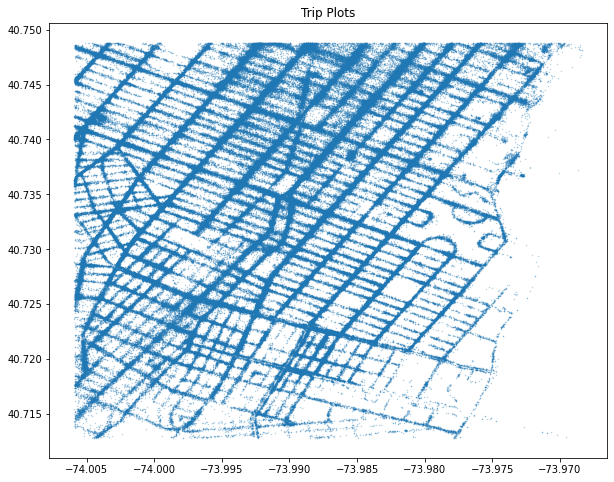

In [271]:
longitude = list(nyc_df.pickup_longitude) + list(nyc_df.dropoff_longitude)
latitude = list(nyc_df.pickup_latitude) + list(nyc_df.dropoff_latitude)
plt.figure(figsize = (10,8))
plt.plot(longitude,latitude,'.',alpha = .40, markersize = .8)
plt.title('Trip Plots')
plt.show()

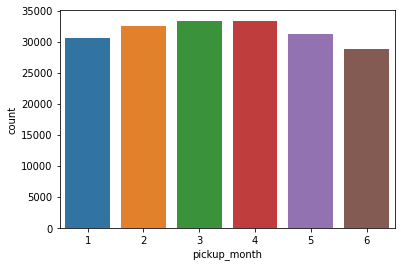

In [272]:
sns.countplot(x='pickup_month', data=nyc_df)

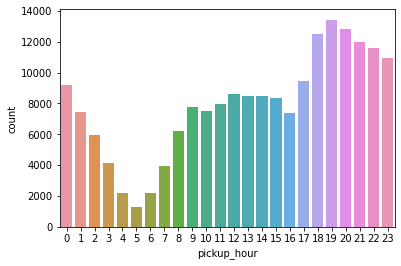

In [273]:
sns.countplot(x='pickup_hour', data=nyc_df)

# **Algorithm Development**

Let's plot numerical features and outline mean and median of each feature.

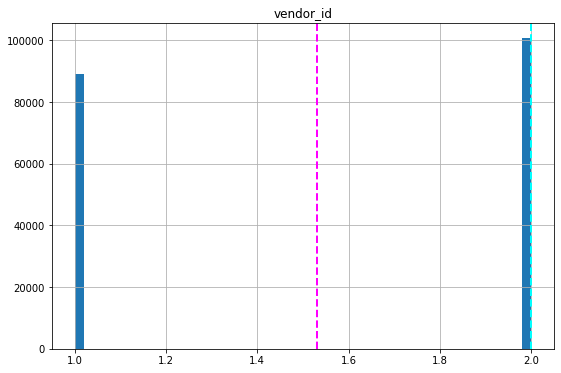

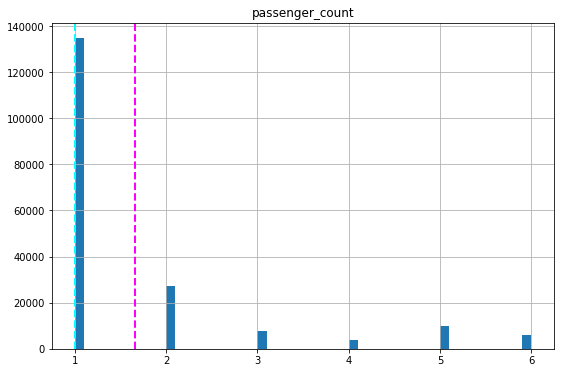

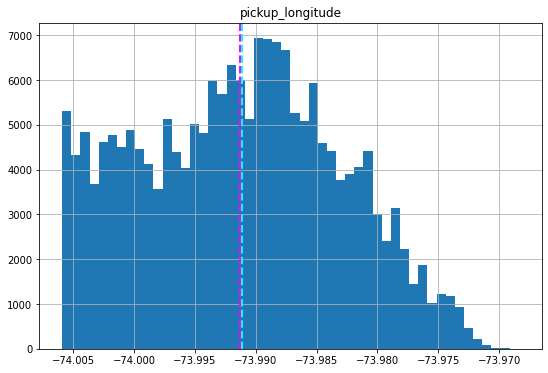

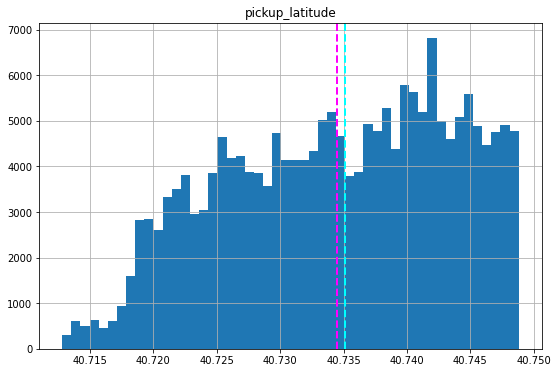

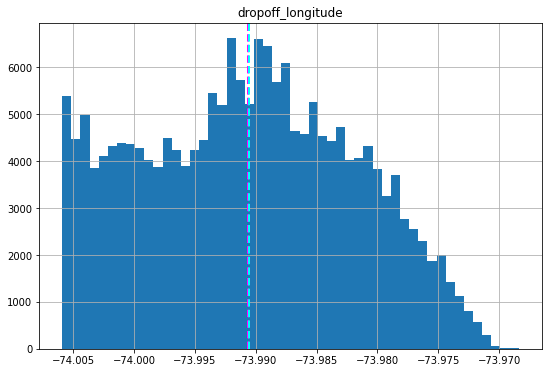

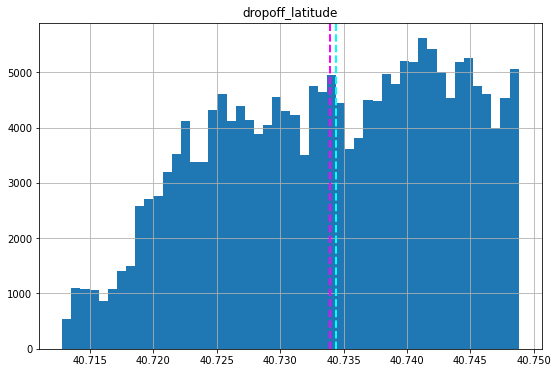

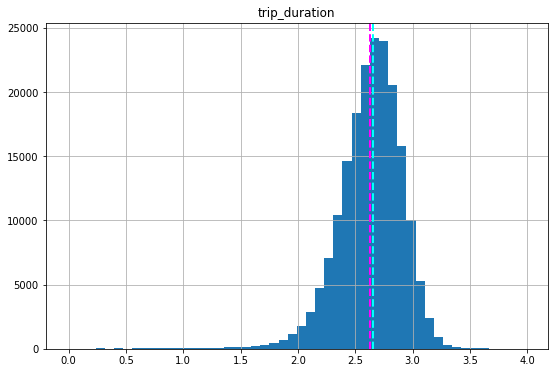

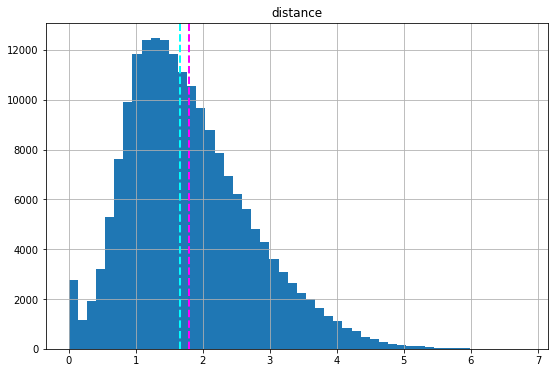

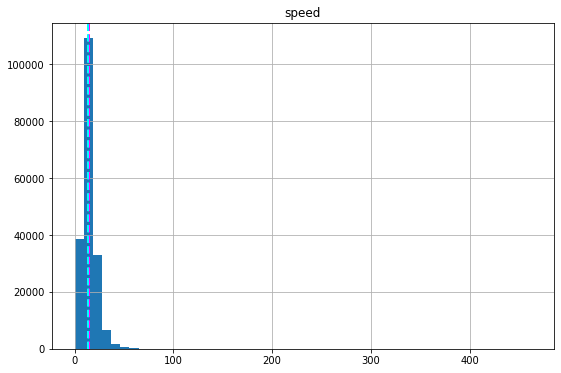

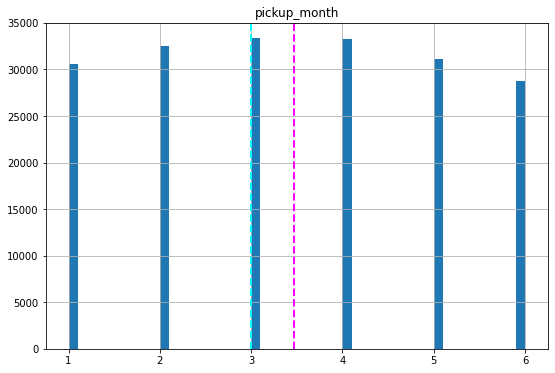

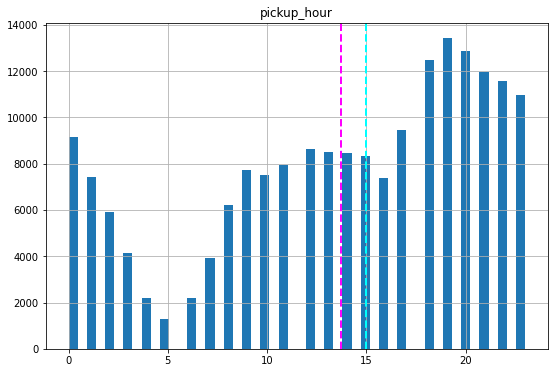

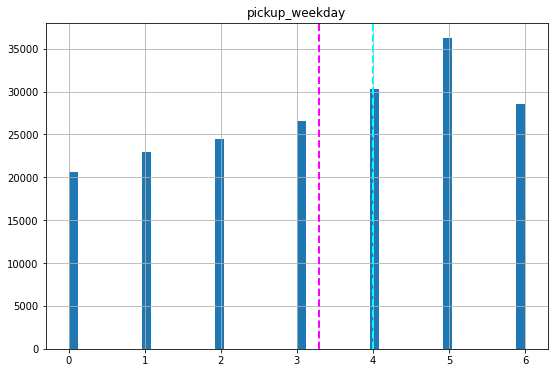

In [274]:
#Numerical features
numeric_features=nyc_df.describe().columns

#plotting numeric features with mean and median values
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=nyc_df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

The mean and median values are close for each numeric feature. Also some of the features are actually categorical and we may dismiss them from training dataset.

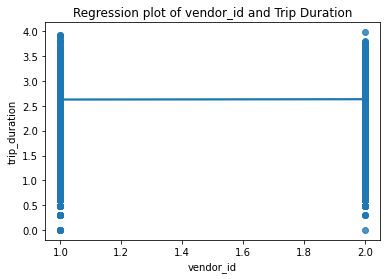

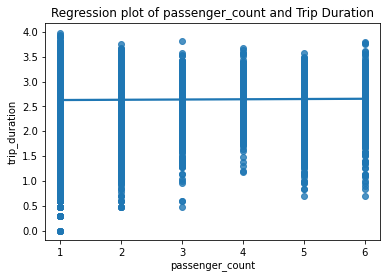

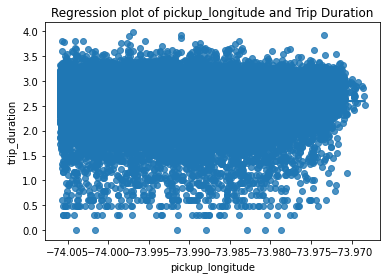

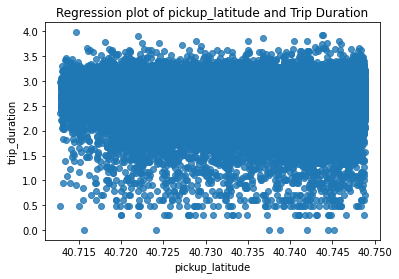

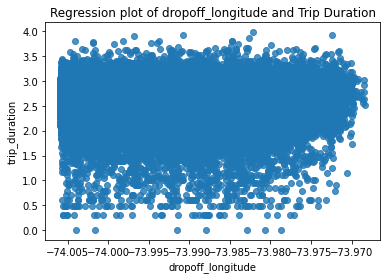

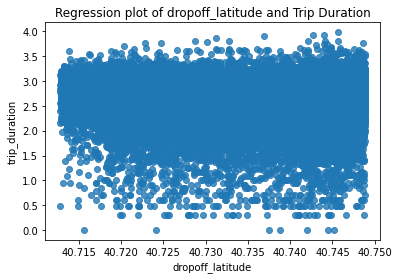

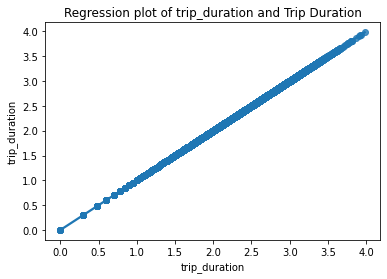

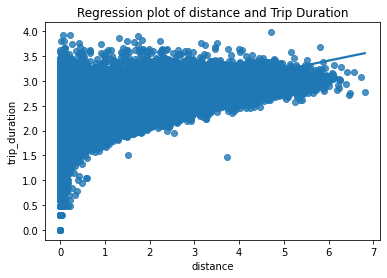

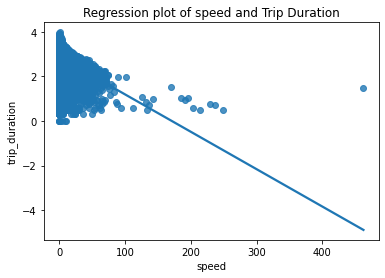

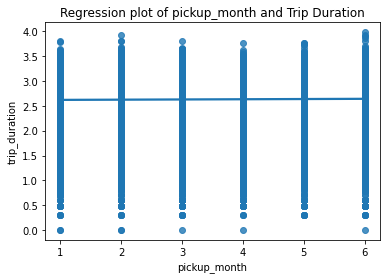

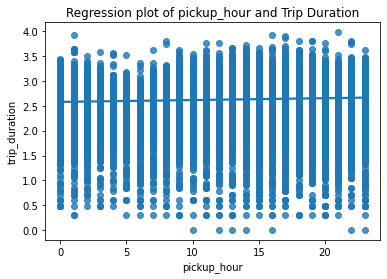

In [275]:
#fitting regression line on numeric features|
for var in numeric_features[0:-1]:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='trip_duration', data=nyc_df, ci=None).set(title=f'Regression plot of {var} and Trip Duration')

The regression line is not a fit for any of the variables except distance and speed. That means a linear relationship exists between speed, ditance and trip_duration.

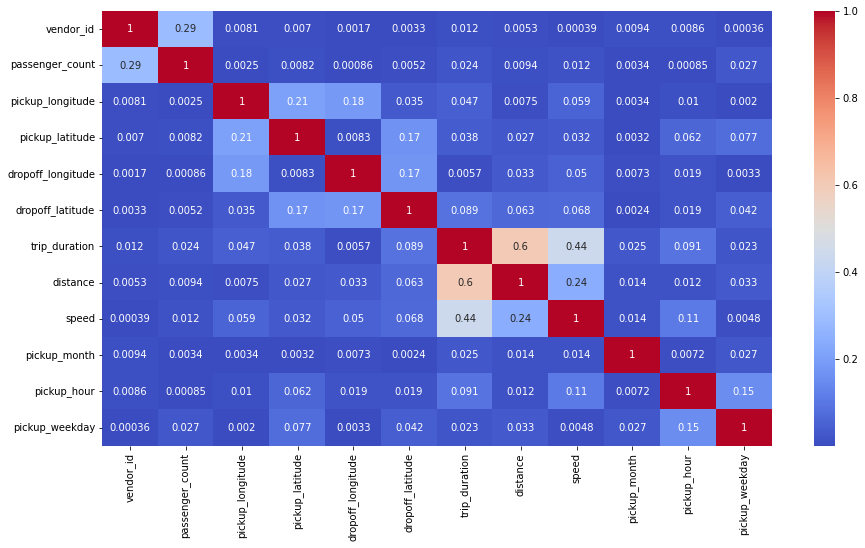

In [276]:
plt.figure(figsize=(15,8))
correlation = nyc_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The relationship between speed and distance have somewhat correlation. Also the correlation between trip duration and distance is more than that of speed.

Lets look for the variance inflation factor.

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [278]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i not in ['trip_duration']]])

,variables,VIF
0,vendor_id,1.138391e+01
1,passenger_count,2.854828e+00
2,pickup_longitude,5.530625e+07
3,pickup_latitude,1.949084e+07
4,dropoff_longitude,5.504239e+07
5,dropoff_latitude,1.863907e+07
6,distance,5.198199e+00
7,speed,5.335513e+00
8,pickup_month,5.298870e+00
9,pickup_hour,5.154911e+00


In [279]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i not in ['trip_duration','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]])

,variables,VIF
0,vendor_id,8.329870
1,passenger_count,2.842914
2,distance,4.859658
3,speed,4.668392
4,pickup_month,4.459905
5,pickup_hour,4.120077
6,pickup_weekday,3.427884


In [280]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i not in ['trip_duration','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','vendor_id']]])

,variables,VIF
0,passenger_count,2.431490
1,distance,4.764912
2,speed,4.429453
3,pickup_month,4.177857
4,pickup_hour,3.718215
5,pickup_weekday,3.238110


In [281]:
numerical_features=['passenger_count','distance','speed','pickup_month','pickup_hour','pickup_weekday']

In [282]:
model_df=nyc_df

In [283]:
X=model_df[numerical_features]

In [284]:
y=model_df['trip_duration']

In [285]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(151744, 6)
(37937, 6)


## **Multivariate Linear Regression**

In [286]:
reg = LinearRegression().fit(X_train, y_train)

In [287]:
reg.score(X_train, y_train)

0.7361788675234631

In [288]:
reg.coef_

array([ 0.00163022,  0.2325518 , -0.02412581,  0.00105958,  0.00057651,
        0.00029009])

In [289]:
reg.intercept_

2.5486130681262327

In [290]:
y_pred = reg.predict(X_test)

In [291]:
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(10**y_test,10**y_pred))
print('MAE:',metrics.mean_absolute_error(10**y_test,10**y_pred))
print('MSE:',metrics.mean_squared_error(10**y_test,10**y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(10**y_test,10**y_pred)))


Linear Regression Performance Metrics
R^2= 0.6144891455541558
MAE: 86.84349599959229
MSE: 36098.94748648176
RMSE: 189.99723020739475


In [297]:
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.6122448025332838


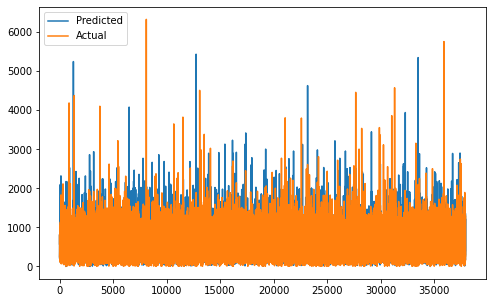

In [292]:
plt.figure(figsize=(8,5))
plt.plot(10**y_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Ridge Regression**

In [293]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [294]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 40}

Using  {'alpha': 40}  the negative mean squared error is:  -0.021088828585280675


In [295]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [298]:
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(10**y_test,10**y_pred_ridge))
print('MAE:',metrics.mean_absolute_error(10**y_test,10**y_pred_ridge))
print('MSE:',metrics.mean_squared_error(10**y_test,10**y_pred_ridge))
print('RMSE:',np.sqrt(metrics.mean_squared_error(10**y_test,10**y_pred_ridge)))


Linear Regression Performance Metrics
R^2= 0.6148273098629051
MAE: 86.81548450819021
MSE: 36068.651700577495
RMSE: 189.91748655818267


In [299]:
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.6125702233353756


## **Lasso Regression**

In [300]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [301]:
lasso.score(X_train, y_train)

0.7361785490215192

In [302]:
lasso.coef_

array([ 0.00157415,  0.23242483, -0.02412048,  0.00102415,  0.00057404,
        0.0002644 ])

In [304]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [305]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.021091479690263155


In [306]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [308]:
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(10**y_test,10**y_pred_lasso))
print('MAE:',metrics.mean_absolute_error(10**y_test,10**y_pred_lasso))
print('MSE:',metrics.mean_squared_error(10**y_test,10**y_pred_lasso))
print('RMSE:',np.sqrt(metrics.mean_squared_error(10**y_test,10**y_pred_lasso)))


Linear Regression Performance Metrics
R^2= 0.6145411493551284
MAE: 86.83895440868865
MSE: 36094.316518478474
RMSE: 189.98504288095543


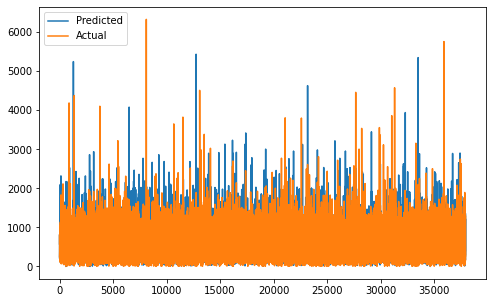

In [307]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Elastic Net**

In [309]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [310]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [311]:
elasticnet.score(X_train, y_train)

0.6795839662340581

In [312]:
y_pred_en = elasticnet.predict(X_test)

In [313]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 31429.793251148025
RMSE : 177.2844980565081
R2 : 0.6624517051883299
Adjusted R2 :  0.6623983097290926


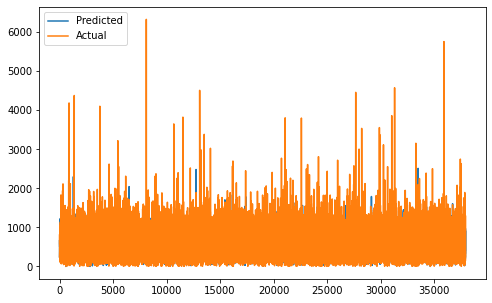

In [314]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()